# **Zimnat Insurance Recommendation Challenge - Zindi** 

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [ ]:
#Importing data
train_data=pd.read_csv('/content/drive/My Drive/Train (1).csv',parse_dates=['join_date'])
test_data=pd.read_csv('/content/drive/My Drive/Test (1).csv',parse_dates=['join_date'])

In [ ]:
train_data.head()

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,LJR9,N2MW,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
0,4WKQSBB,2019-01-02,F,M,1987,1X1H,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,CP5S02H,2019-01-06,F,M,1981,UAOD,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2YKDILJ,2013-01-06,M,U,1991,748L,QZYX,90QI,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2S9E81J,2019-01-08,M,M,1990,1X1H,BP09,56SI,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,BHDYVFT,2019-01-08,M,M,1990,748L,NO3L,T4MS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [ ]:
test_data.head()

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,LJR9,N2MW,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
0,F86J5PC,2018-01-12,M,M,1984,94KC,DZRV,90QI,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,H6141K3,2019-01-10,M,M,1996,1X1H,J9SY,90QI,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,RBAYUXZ,2020-01-01,F,W,1968,UAOD,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,KCBILBQ,2019-01-02,M,M,1989,94KC,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,LSEC1ZJ,2020-01-02,F,M,1982,UAOD,0KID,T4MS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


**After we read the data, we can look at the data using:**

In [ ]:
print ('The train data has {0} rows and {1} columns'.format(train_data.shape[0],train_data.shape[1]))
print ('----------------------------')
print ('The test data has {0} rows and {1} columns'.format(test_data.shape[0],test_data.shape[1]))

The train data has 29132 rows and 29 columns
----------------------------
The test data has 10000 rows and 29 columns


**Alternatively, you can also check the data set information using the info() command.**

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29132 entries, 0 to 29131
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        29132 non-null  object        
 1   join_date                 29130 non-null  datetime64[ns]
 2   sex                       29132 non-null  object        
 3   marital_status            29132 non-null  object        
 4   birth_year                29132 non-null  int64         
 5   branch_code               29132 non-null  object        
 6   occupation_code           29132 non-null  object        
 7   occupation_category_code  29132 non-null  object        
 8   P5DA                      29132 non-null  int64         
 9   RIBP                      29132 non-null  int64         
 10  8NN1                      29132 non-null  int64         
 11  7POT                      29132 non-null  int64         
 12  66FJ              

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        10000 non-null  object        
 1   join_date                 9999 non-null   datetime64[ns]
 2   sex                       10000 non-null  object        
 3   marital_status            10000 non-null  object        
 4   birth_year                10000 non-null  int64         
 5   branch_code               10000 non-null  object        
 6   occupation_code           10000 non-null  object        
 7   occupation_category_code  10000 non-null  object        
 8   P5DA                      10000 non-null  int64         
 9   RIBP                      10000 non-null  int64         
 10  8NN1                      10000 non-null  int64         
 11  7POT                      10000 non-null  int64         
 12  66FJ               

In [ ]:
#missing value counts in each of these columns
miss = train_data.isnull().sum()/len(train_data)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

join_date    0.000069
dtype: float64

In [ ]:
#missing value counts in each of these columns
miss = test_data.isnull().sum()/len(test_data)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

join_date    0.0001
dtype: float64

From the iformation above, we can see that our training dataset has two null values and testing dataset has one null value, all of them in the join_date column

We will go ahead and impute the null values with the most frequent date

In [ ]:
train_data['join_date'].fillna(train_data['join_date'].value_counts().index[0],inplace=True)
test_data['join_date'].fillna(test_data['join_date'].value_counts().index[0],inplace=True)

## **Feature Engineering**



### **Date features**

In [ ]:
train_data['month'] = train_data.join_date.dt.month
train_data['year'] = train_data.join_date.dt.year
test_data['month'] = test_data.join_date.dt.month
test_data['year'] = test_data.join_date.dt.year

In [ ]:
train_data

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,LJR9,N2MW,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3,month,year
0,4WKQSBB,2019-01-02,F,M,1987,1X1H,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2019
1,CP5S02H,2019-01-06,F,M,1981,UAOD,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2019
2,2YKDILJ,2013-01-06,M,U,1991,748L,QZYX,90QI,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2013
3,2S9E81J,2019-01-08,M,M,1990,1X1H,BP09,56SI,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2019
4,BHDYVFT,2019-01-08,M,M,1990,748L,NO3L,T4MS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29127,8SBA93U,2019-01-09,F,M,1974,748L,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2019
29128,Y73ETTO,2018-01-11,M,M,1987,XX25,Q6J6,90QI,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2018
29129,MVXG2LC,2019-01-02,M,M,1985,BOAS,6PE7,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2019
29130,BUQ8DQN,2019-01-07,M,M,1989,UAOD,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2019


### **Numerical Features**

In [ ]:
contFeatureslist = []
for colName,x in train_data.iloc[1,:].iteritems():
    #print(x)
    if(not str(x).isalpha()):
        contFeatureslist.append(colName)

In [ ]:
print(contFeatureslist)

['ID', 'join_date', 'birth_year', 'occupation_code', 'occupation_category_code', 'P5DA', 'RIBP', '8NN1', '7POT', '66FJ', 'GYSR', 'SOP4', 'RVSZ', 'PYUQ', 'LJR9', 'N2MW', 'AHXO', 'BSTQ', 'FM3X', 'K6QO', 'QBOL', 'JWFN', 'JZ9D', 'J9JW', 'GHYX', 'ECY3', 'month', 'year']


In [ ]:
contFeatureslist.remove("ID")
contFeatureslist.remove("join_date")
contFeatureslist.remove("occupation_code")
contFeatureslist.remove("occupation_category_code")


### **Box plots for continuous features**

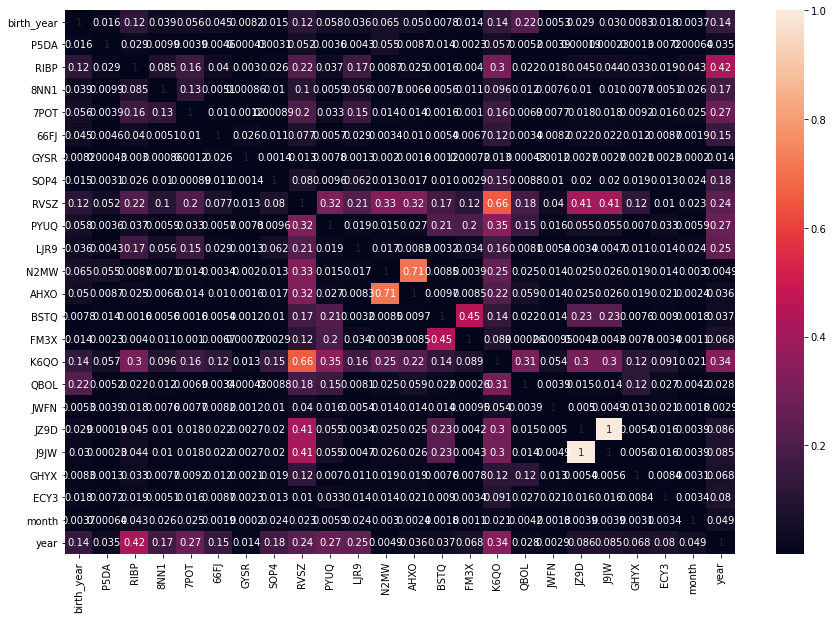

In [ ]:
correlationMatrix = train_data[contFeatureslist].corr().abs()

plt.subplots(figsize=(15, 10))
sns.heatmap(correlationMatrix,annot=True)

# Mask unimportant features
sns.heatmap(correlationMatrix, mask=correlationMatrix < 1, cbar=False)
plt.show()

### **Categorical Features**

In [ ]:
catCount = sum(str(x).isalpha() for x in train_data.iloc[1,:])
print("Number of categories: ",catCount)

Number of categories:  3


In [ ]:
catFeatureslist = []
for colName,x in train_data.iloc[1,:].iteritems():
    if(str(x).isalpha()):
        catFeatureslist.append(colName)


In [ ]:
catFeatureslist=train_data[['occupation_category_code','occupation_code','branch_code','marital_status','sex']]

In [ ]:
for cf1 in catFeatureslist:
    le = LabelEncoder()
    le.fit(train_data[cf1].unique())
    train_data[cf1] = le.transform(train_data[cf1])


In [ ]:
del train_data['join_date']

In [ ]:
train_data

,ID,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,LJR9,N2MW,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3,month,year
0,4WKQSBB,0,1,1987,0,17,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2019
1,CP5S02H,0,1,1981,11,17,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2019
2,2YKDILJ,1,5,1991,3,176,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2013
3,2S9E81J,1,1,1990,0,76,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2019
4,BHDYVFT,1,1,1990,3,148,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29127,8SBA93U,0,1,1974,3,17,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2019
29128,Y73ETTO,1,1,1987,13,170,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2018
29129,MVXG2LC,1,1,1985,6,44,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2019
29130,BUQ8DQN,1,1,1989,11,17,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2019


In [ ]:
train_data

,ID,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,LJR9,N2MW,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3,month,year
0,4WKQSBB,0,1,1987,0,17,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2019
1,CP5S02H,0,1,1981,11,17,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2019
2,2YKDILJ,1,5,1991,3,176,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2013
3,2S9E81J,1,1,1990,0,76,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2019
4,BHDYVFT,1,1,1990,3,148,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29127,8SBA93U,0,1,1974,3,17,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2019
29128,Y73ETTO,1,1,1987,13,170,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2018
29129,MVXG2LC,1,1,1985,6,44,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2019
29130,BUQ8DQN,1,1,1989,11,17,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2019


In [ ]:
# retrieve just the numeric input values
num_cols = ['sex',"marital_status","birth_year", 'branch_code','occupation_code', 'occupation_category_code', 'P5DA','RIBP','8NN1',	'7POT','66FJ','GYSR',	'SOP4',	'RVSZ','PYUQ',	'LJR9','N2MW','AHXO',	'BSTQ',	'FM3X',	'K6QO',	'QBOL',	'JWFN',	'JZ9D',	'J9JW',	'GHYX',	'ECY3',	'month',	'year']

In [ ]:
# perform a robust scaler transform of the dataset
trans = RobustScaler()
train_data[num_cols] = trans.fit_transform(train_data[num_cols])

In [ ]:
train_data

,ID,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,LJR9,N2MW,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3,month,year
0,4WKQSBB,-1.0,0.0,0.500000,-0.571429,-0.081761,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
1,CP5S02H,-1.0,0.0,0.071429,1.000000,-0.081761,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
2,2YKDILJ,0.0,4.0,0.785714,-0.142857,0.918239,-1.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-2.5
3,2S9E81J,0.0,0.0,0.714286,-0.571429,0.289308,-1.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
4,BHDYVFT,0.0,0.0,0.714286,-0.142857,0.742138,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29127,8SBA93U,-1.0,0.0,-0.428571,-0.142857,-0.081761,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
29128,Y73ETTO,0.0,0.0,0.500000,1.285714,0.880503,-1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29129,MVXG2LC,0.0,0.0,0.357143,0.285714,0.088050,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
29130,BUQ8DQN,0.0,0.0,0.642857,1.000000,-0.081761,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5


In [ ]:
X=train_data.drop(columns=['ID','P5DA','RIBP','8NN1',	'7POT','66FJ','GYSR',	'SOP4',	'RVSZ','PYUQ',	'LJR9','N2MW','AHXO',	'BSTQ',	'FM3X',	'K6QO',	'QBOL',	'JWFN',	'JZ9D',	'J9JW',	'GHYX',	'ECY3'])
y=train_data[['P5DA','RIBP','8NN1',	'7POT','66FJ','GYSR',	'SOP4',	'RVSZ','PYUQ',	'LJR9','N2MW','AHXO',	'BSTQ',	'FM3X',	'K6QO',	'QBOL',	'JWFN',	'JZ9D',	'J9JW',	'GHYX',	'ECY3']]
print(X.shape)
print(y.shape)

(29132, 8)
(29132, 21)


In [ ]:
#For training and testing of the model we will split the data, 90% of the data, training data and 10% to test data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(23305, 8)
(23305, 21)
(5827, 8)
(5827, 21)


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23305 entries, 11496 to 235
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sex                       23305 non-null  float64
 1   marital_status            23305 non-null  float64
 2   birth_year                23305 non-null  float64
 3   branch_code               23305 non-null  float64
 4   occupation_code           23305 non-null  float64
 5   occupation_category_code  23305 non-null  float64
 6   month                     23305 non-null  float64
 7   year                      23305 non-null  float64
dtypes: float64(8)
memory usage: 1.6 MB


In [ ]:
target = ['P5DA','RIBP','8NN1',	'7POT','66FJ','GYSR',	'SOP4',	'RVSZ','PYUQ',	'LJR9','N2MW','AHXO',	'BSTQ',	'FM3X',	'K6QO',	'QBOL',	'JWFN',	'JZ9D',	'J9JW',	'GHYX',	'ECY3']
IDcol = 'ID'

In [ ]:
import xgboost as xgb

In [ ]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[['P5DA','RIBP','8NN1',	'7POT','66FJ','GYSR',	'SOP4',	'RVSZ','PYUQ',	'LJR9','N2MW','AHXO',	'BSTQ',	'FM3X',	'K6QO',	'QBOL',	'JWFN',	'JZ9D',	'J9JW',	'GHYX',	'ECY3']],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % accuracy_score(dtrain['Disbursed'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % roc_auc_score(dtrain['Disbursed'], dtrain_predprob))
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [ ]:
#Choose all predictors except target & IDcols
predictors = [x for x in train_data.columns if x not in [target, IDcol]]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, train_data, predictors)